<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
Missing values in each column:
 Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%

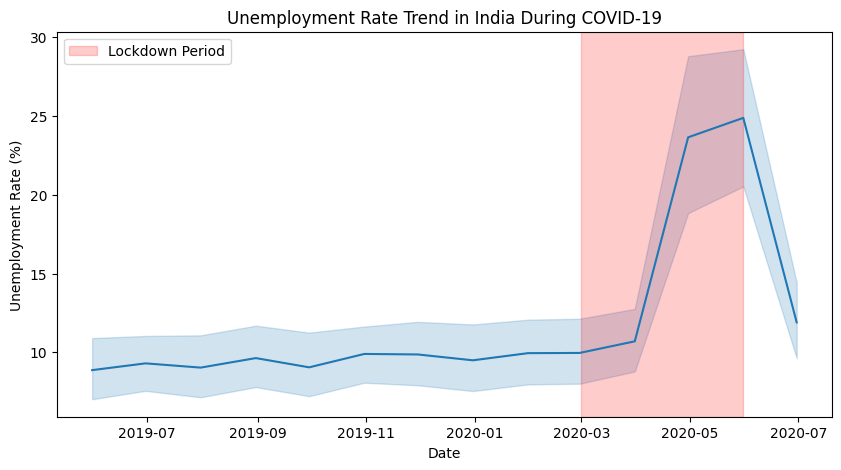

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB
Missing values in each column:
 Region              

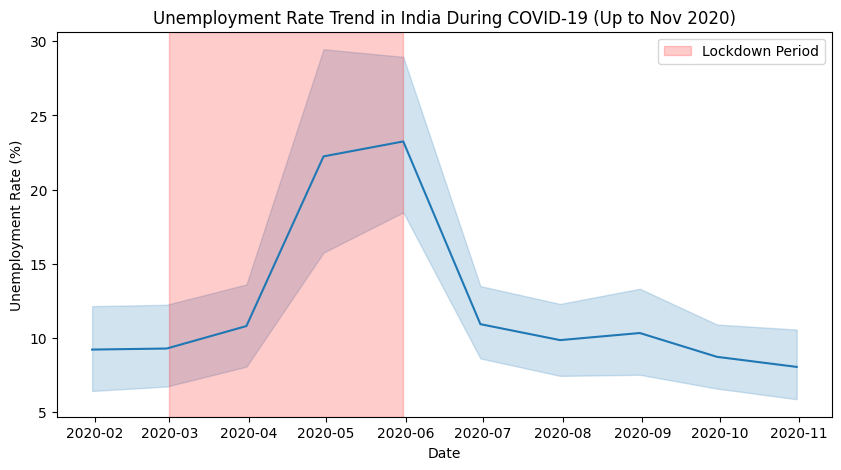

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load first dataset

df = pd.read_csv("Unemployment in India.csv")

# Show info about data types
df.info()

# Summary statistics
df.describe()

# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")

# Drop duplicates only if present
if duplicate_count > 0:
    df = df.drop_duplicates()
    print("\nDuplicates removed successfully!")
else:
    print("\nNo duplicate rows found.")


# Data Cleaning & Visualization


df.columns = df.columns.str.strip()

# Convert date to proper datetime type
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Plot unemployment trend over time
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)')

# Highlight lockdown period
plt.axvspan('2020-03-01', '2020-05-31', color='red', alpha=0.2, label='Lockdown Period')

plt.title("Unemployment Rate Trend in India During COVID-19")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.show()



# Load second dataset (up to Nov 2020)

df2 = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

# Dataset info
df2.info()
df2.describe()

# Check for missing values
print("Missing values in each column:\n", df2.isnull().sum())

# Check for duplicates
duplicate_count = df2.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")

# Drop duplicates only if present
if duplicate_count > 0:
    df2 = df2.drop_duplicates()
    print("\nDuplicates removed successfully!")
else:
    print("\nNo duplicate rows found.")

# Clean column names
df2.columns = df2.columns.str.strip()

# Convert date to datetime
df2['Date'] = pd.to_datetime(df2['Date'], dayfirst=True)

# Plot unemployment trend for dataset 2
plt.figure(figsize=(10, 5))
sns.lineplot(data=df2, x='Date', y='Estimated Unemployment Rate (%)')
plt.axvspan('2020-03-01', '2020-05-31', color='red', alpha=0.2, label='Lockdown Period')
plt.title("Unemployment Rate Trend in India During COVID-19 (Up to Nov 2020)")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.show()
